# Working Notebook for the Movie Project

This is the working notebook, not part of the final package. 

## Github repo:
https://github.com/akharina/dc-ds_movie_project.git


## Data directory:
* data/raw          : provided datasets
* data/raw/kaggle   : data from [Kaggle](https://www.kaggle.com/rounakbanik/the-movies-dataset)



## Workflow:
1. Exploring datasets

In [1]:
# %load https://flokilum.github.io/jupyter.py
# standard imports

# print everything
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import sys
print('python:', sys.version_info[:3])

import numpy as np
print('numpy:', np.__version__)

import pandas as pd
print('pandas:', pd.__version__)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
print('seaborn:', sns.__version__)
plt.style.use('ggplot')

!pip install pyyaml
import yaml

python: (3, 7, 4)
numpy: 1.16.4
pandas: 0.25.0
seaborn: 0.9.0
8.3.0


In [2]:
# read main movie data
df1 = pd.read_csv("data-raw/movies_metadata.csv.gz", low_memory=False)
df1.head()
df1.info()
df1.shape

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

(45466, 24)

In [3]:
# read cast/crew movie data
df2 = pd.read_csv("data-raw/credits.csv.gz", low_memory=False)
df2.head()
df2.info()
df2.shape

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
cast    45476 non-null object
crew    45476 non-null object
id      45476 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


(45476, 3)

In [4]:
# remove duplicated entries (by "id" column)
df1.shape
df1.drop_duplicates(subset=["id"], inplace=True)
df1.shape
df1["id"].min(), df1["id"].max()

(45466, 24)

(45436, 24)

('100', '9999')

In [5]:
# remove duplicated entries (by "id" column)
df2.shape
df2.drop_duplicates(subset=["id"], inplace=True)
df2.shape
df2["id"].min(), df2["id"].max()

(45476, 3)

(45432, 3)

(2, 469172)

In [6]:
# will be merging on "id" columns in df1 and df2
# but df1["id"] is not properly formatted
df1["id"] = pd.to_numeric(df1["id"], errors="coerce")
df1.dropna(axis=0, subset=["id"], inplace=True)
df1["id"] = df1["id"].astype("int64")
df1.info()
df1.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45433 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45433 non-null object
belongs_to_collection    4488 non-null object
budget                   45433 non-null object
genres                   45433 non-null object
homepage                 7774 non-null object
id                       45433 non-null int64
imdb_id                  45416 non-null object
original_language        45422 non-null object
original_title           45433 non-null object
overview                 44479 non-null object
popularity               45430 non-null object
poster_path              45047 non-null object
production_companies     45430 non-null object
production_countries     45430 non-null object
release_date             45346 non-null object
revenue                  45430 non-null float64
runtime                  45173 non-null float64
spoken_languages         45430 non-null object
status                   45349 non-null object

(45433, 24)

In [7]:
# merge dataframes
df = df1.merge(df2, on="id", how="left", validate="1:1")
df.head()
df.shape

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


(45433, 26)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45433 entries, 0 to 45432
Data columns (total 26 columns):
adult                    45433 non-null object
belongs_to_collection    4488 non-null object
budget                   45433 non-null object
genres                   45433 non-null object
homepage                 7774 non-null object
id                       45433 non-null int64
imdb_id                  45416 non-null object
original_language        45422 non-null object
original_title           45433 non-null object
overview                 44479 non-null object
popularity               45430 non-null object
poster_path              45047 non-null object
production_companies     45430 non-null object
production_countries     45430 non-null object
release_date             45346 non-null object
revenue                  45430 non-null float64
runtime                  45173 non-null float64
spoken_languages         45430 non-null object
status                   45349 non-null object

In [9]:
# process column "adult"
# only 9 true values - delete

df["adult"].value_counts()
del df["adult"]

False    45424
True         9
Name: adult, dtype: int64

In [10]:
# process column "belongs_to_collection"
# dictionaries or NULLS, keep the value for the "name" key

df["belongs_to_collection"].head()

def _parse_dictionaries(_dict_obj):
    try:
        return yaml.load(_dict_obj, Loader=yaml.FullLoader)["name"]
    except:
        return np.NaN

df["belongs_to_collection"] = df["belongs_to_collection"].apply(_parse_dictionaries)

df["belongs_to_collection"].head()

0    {'id': 10194, 'name': 'Toy Story Collection', ...
1                                                  NaN
2    {'id': 119050, 'name': 'Grumpy Old Men Collect...
3                                                  NaN
4    {'id': 96871, 'name': 'Father of the Bride Col...
Name: belongs_to_collection, dtype: object

0              Toy Story Collection
1                               NaN
2         Grumpy Old Men Collection
3                               NaN
4    Father of the Bride Collection
Name: belongs_to_collection, dtype: object

In [11]:
# process column "budget"
# convert to numeric
df["budget"] = pd.to_numeric(df1["budget"], errors="coerce").fillna(0)
df["budget"].describe()

# convert to millions
df["budget"] = df["budget"] / 1000000
df["budget"].describe()

# values smaller than 1 are not relevant
# convert them to -1 (million)
df.loc[df["budget"] < 1, "budget"] = -1
df["budget"].describe()

# some 30 values are still missing ?!?

count    4.540000e+04
mean     4.227620e+06
std      1.743395e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64

count    45400.00000
mean         4.22762
std         17.43395
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max        380.00000
Name: budget, dtype: float64

count    45400.000000
mean         3.380974
std         17.641317
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        380.000000
Name: budget, dtype: float64

In [12]:
# process column "genres"
# list of dictionaries, keep the values for the "name" keys

df["genres"].head()

def _parse_list_of_dictionaries(_list_obj):
    try:
        return [_dict_obj["name"] for _dict_obj in yaml.load(_list_obj, Loader=yaml.FullLoader)]
    except:
        return np.NaN

df["genres"] = df["genres"].apply(_parse_list_of_dictionaries)

df["genres"].head()

0    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2    [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                       [{'id': 35, 'name': 'Comedy'}]
Name: genres, dtype: object

0     [Animation, Comedy, Family]
1    [Adventure, Fantasy, Family]
2               [Romance, Comedy]
3        [Comedy, Drama, Romance]
4                        [Comedy]
Name: genres, dtype: object

In [13]:
# process column "original_language"
# keep the 10 most common, set the rest to "zz"

df["original_language"].value_counts()[:10]

languages = list(df["original_language"].value_counts()[:10].index)
df.loc[~df["original_language"].isin(languages), "original_language"] = "zz"

df["original_language"].value_counts()

en    32251
fr     2436
it     1529
ja     1347
de     1079
es      994
ru      826
hi      508
ko      444
zh      409
Name: original_language, dtype: int64

en    32251
zz     3610
fr     2436
it     1529
ja     1347
de     1079
es      994
ru      826
hi      508
ko      444
zh      409
Name: original_language, dtype: int64

In [14]:
# process column "original_title"
df["original_title"].head()

0                      Toy Story
1                        Jumanji
2               Grumpier Old Men
3              Waiting to Exhale
4    Father of the Bride Part II
Name: original_title, dtype: object

In [15]:
# process column "overview"
df["overview"].head()
df["overview"][1]

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures."

In [16]:
# process column "popularity"
# convert to numeric
df["popularity"] = pd.to_numeric(df1["popularity"], errors="coerce").fillna(0)
df["popularity"].describe()

# some values larger than 10 are present

count    45400.000000
mean         2.922112
std          6.007798
min          0.000000
25%          0.386310
50%          1.128049
75%          3.679479
max        547.488298
Name: popularity, dtype: float64

In [17]:
# process column "production_companies"
# list of dictionaries, keep the values for the "name" keys

df["production_companies"].head()

def _parse_list_of_dictionaries(_list_obj):
    try:
        return [_dict_obj["name"] for _dict_obj in yaml.load(_list_obj, Loader=yaml.FullLoader)]
    except:
        return np.NaN

df["production_companies"] = df["production_companies"].apply(_parse_list_of_dictionaries)

df["production_companies"].head()

0       [{'name': 'Pixar Animation Studios', 'id': 3}]
1    [{'name': 'TriStar Pictures', 'id': 559}, {'na...
2    [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
3    [{'name': 'Twentieth Century Fox Film Corporat...
4    [{'name': 'Sandollar Productions', 'id': 5842}...
Name: production_companies, dtype: object

0                            [Pixar Animation Studios]
1    [TriStar Pictures, Teitler Film, Interscope Co...
2                       [Warner Bros., Lancaster Gate]
3             [Twentieth Century Fox Film Corporation]
4         [Sandollar Productions, Touchstone Pictures]
Name: production_companies, dtype: object

In [18]:
# process column "production_countries"
# list of dictionaries, keep the values for the "iso_3166_1" keys

df["production_countries"].head()

def _parse_list_of_dictionaries(_list_obj):
    try:
        return [_dict_obj["iso_3166_1"] for _dict_obj in yaml.load(_list_obj, Loader=yaml.FullLoader)]
    except:
        return np.NaN

df["production_countries"] = df["production_countries"].apply(_parse_list_of_dictionaries)

df["production_countries"].head()
df["production_countries"].value_counts()[:10]

0    [{'iso_3166_1': 'US', 'name': 'United States o...
1    [{'iso_3166_1': 'US', 'name': 'United States o...
2    [{'iso_3166_1': 'US', 'name': 'United States o...
3    [{'iso_3166_1': 'US', 'name': 'United States o...
4    [{'iso_3166_1': 'US', 'name': 'United States o...
Name: production_countries, dtype: object

0    [US]
1    [US]
2    [US]
3    [US]
4    [US]
Name: production_countries, dtype: object

[US]    17841
[]       6279
[GB]     2238
[FR]     1653
[JP]     1354
[IT]     1030
[CA]      840
[DE]      748
[IN]      735
[RU]      735
Name: production_countries, dtype: int64

In [19]:
# process column "release_date"
df["release_date"].head()

# fill null values with an older date
df['release_date'] = df['release_date'].fillna('1800-01-01')

# remove wrong entries
wrong_date = df['release_date'].loc[df['release_date'].apply(len) < 10]
df = df.drop(index=list(wrong_date.index))

# new column "date"
df['date'] = pd.to_datetime(df['release_date'])

df["date"].head()
df["date"].describe()

del df["release_date"]

0    1995-10-30
1    1995-12-15
2    1995-12-22
3    1995-12-22
4    1995-02-10
Name: release_date, dtype: object

0   1995-10-30
1   1995-12-15
2   1995-12-22
3   1995-12-22
4   1995-02-10
Name: date, dtype: datetime64[ns]

count                   45433
unique                  17334
top       2008-01-01 00:00:00
freq                      136
first     1800-01-01 00:00:00
last      2020-12-16 00:00:00
Name: date, dtype: object

In [20]:
# add column "year"
df["year"] = df["date"].dt.year

df["year"].value_counts()[:10]

2014    1973
2015    1904
2013    1887
2012    1721
2011    1666
2016    1604
2009    1585
2010    1501
2008    1470
2007    1319
Name: year, dtype: int64

In [21]:
# add column "week"
df["week"] = df["date"].dt.week

df["week"].value_counts()[:10]

1     2343
52    1465
36    1328
37    1241
40    1132
41    1066
39    1057
42    1009
44     989
35     960
Name: week, dtype: int64

In [22]:
# process column "revenue"
# convert to numeric
# df["revenue"] = pd.to_numeric(df1["revenue"], errors="coerce").fillna(0)
df["revenue"].describe()

# convert to millions
df["revenue"] = df["revenue"] / 1000000
df["revenue"].describe()

# values smaller than 1 are not relevant
# convert them to -1 (million)
df.loc[df["revenue"] < 1, "revenue"] = -1
df["revenue"].describe()

count    4.543000e+04
mean     1.121288e+07
std      6.435213e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64

count    45430.000000
mean        11.212884
std         64.352130
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2787.965087
Name: revenue, dtype: float64

count    45430.000000
mean        10.338851
std         64.505012
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max       2787.965087
Name: revenue, dtype: float64

In [23]:
# create column "profit"
df["profit"] = df["revenue"] - df["budget"]
df["profit"].describe()

count    45397.000000
mean        -6.915649
std         54.159473
min      -2788.965087
25%         -0.000000
50%         -0.000000
75%         -0.000000
max        742.559607
Name: profit, dtype: float64

<Figure size 1440x720 with 0 Axes>

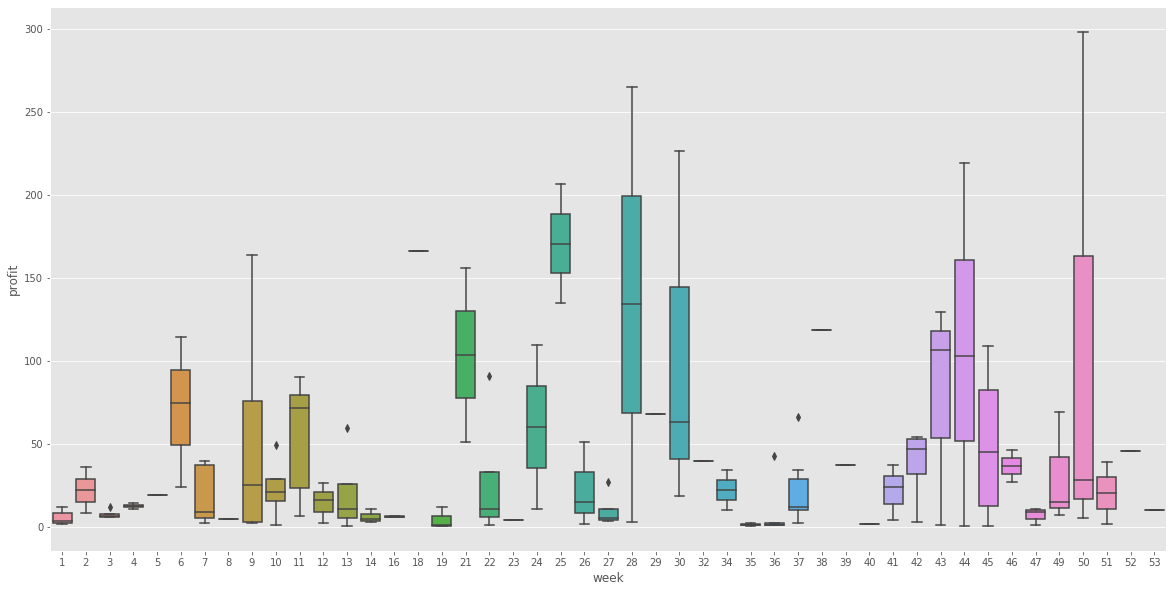

In [28]:
# filter by "budget exists"
filter_1 = df["budget"] > 1

# filter by "budget less than 6 mil"
filter_2 = df["budget"] < 6

# filter by "revenue exists"
filter_3 = df["revenue"] > 1

# filter by "profitable"
filter_4 = df["profit"] > 0

# filter by "recent"
filter_5 = df["year"] > 2000

df_temp = df[filter_1 & filter_2 & filter_3 & filter_4 & filter_5]

plt.figure(figsize=(20,10))

sns.boxplot(
    x = "week",
    y = "profit",
    data = df_temp,
)

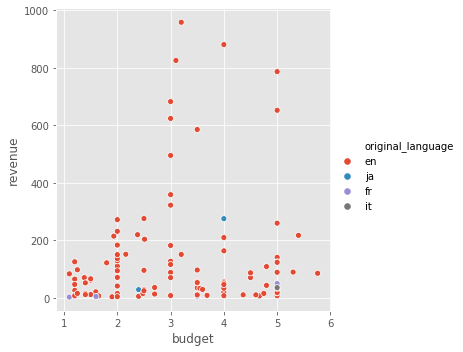

In [52]:
# filter by "budget exists"
filter_1 = df["budget"] > 1

# filter by "budget less than 6 mil"
filter_2 = df["budget"] < 6

# filter by "revenue exists"
filter_3 = df["revenue"] > 1

# filter by "profitable"
filter_4 = df["profit"] > 0

# filter by "recent"
filter_5 = df["year"] > 2000

# filter by "top languages"
filter_6 = df['original_language'].isin(['en','fr','it','ja','de'])

df_temp = df[filter_1 & filter_2 & filter_3 & filter_4 & filter_5 & filter_6]

sns.relplot(
    data = df_temp,
    x = "budget",
    y = "revenue",
    hue = "original_language",
);

In [86]:
def _select_list_item(_list_obj):
    try:
        return _list_obj[0]
    except:
        return np.nan

df["prod_country_1"] = df["production_countries"].apply(_select_list_item)
df["prod_country_1"].head()
df["prod_country_1"].value_counts()

0    US
1    US
2    US
3    US
4    US
Name: prod_country_1, dtype: object

US    18415
GB     3069
FR     2700
CA     1498
JP     1490
      ...  
BM        1
ME        1
AZ        1
LI        1
MQ        1
Name: prod_country_1, Length: 143, dtype: int64

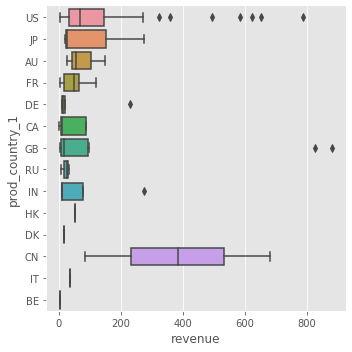

In [112]:
# filter by "budget exists"
filter_1 = df["budget"] > 1

# filter by "budget less than 6 mil"
filter_2 = df["budget"] < 6

# filter by "revenue exists"
filter_3 = df["revenue"] > 1

# filter by "profitable"
filter_4 = df["profit"] > 0

# filter by "recent"
filter_5 = df["year"] > 2000

# filter by "top languages"

# filter by "top languages"
filter_6 = df['prod_country_1'].isin(list(df["prod_country_1"].value_counts().index)[:20])

df_temp = df[filter_1 & filter_2 & filter_3 & filter_4 & filter_5 & filter_6]

sns.catplot(
    data = df_temp,
    x = "revenue",
    y = "prod_country_1",
    kind="box",
);

In [104]:
def _select_list_item(_list_obj):
    try:
        return _list_obj[0]
    except:
        return np.nan

df["prod_comp_1"] = df["production_companies"].apply(_select_list_item)
df["prod_comp_1"].head()
df["prod_comp_1"].value_counts()

0                   Pixar Animation Studios
1                          TriStar Pictures
2                              Warner Bros.
3    Twentieth Century Fox Film Corporation
4                     Sandollar Productions
Name: prod_comp_1, dtype: object

Paramount Pictures                        996
Metro-Goldwyn-Mayer (MGM)                 851
Twentieth Century Fox Film Corporation    780
Warner Bros.                              757
Universal Pictures                        754
                                         ... 
Elliott Kastner Productions                 1
Goat Man's Hill                             1
Aspen Productions                           1
455 Films                                   1
Mirofilm                                    1
Name: prod_comp_1, Length: 10611, dtype: int64

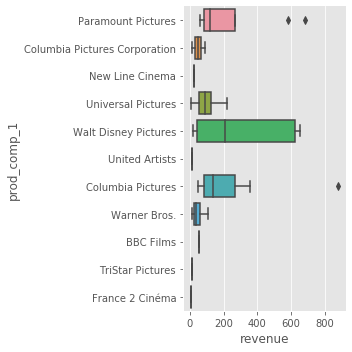

In [111]:
# filter by "budget exists"
filter_1 = df["budget"] > 1

# filter by "budget less than 6 mil"
filter_2 = df["budget"] < 6

# filter by "revenue exists"
filter_3 = df["revenue"] > 1

# filter by "profitable"
filter_4 = df["profit"] > 0

# filter by "recent"
filter_5 = df["year"] > 2000

# filter by "top languages"
filter_6 = df['prod_comp_1'].isin(list(df["prod_comp_1"].value_counts().index)[:20])

df_temp = df[filter_1 & filter_2 & filter_3 & filter_4 & filter_5 & filter_6]

sns.catplot(
    data = df_temp,
    x = "revenue",
    y = "prod_comp_1",
    kind="box",
);

In [90]:
def _select_list_item(_list_obj):
    try:
        return _list_obj[0]
    except:
        return np.nan

df["genres_1"] = df["genres"].apply(_select_list_item)
df["genres_1"].head()
df["genres_1"].value_counts()

0    Animation
1    Adventure
2      Romance
3       Comedy
4       Comedy
Name: genres_1, dtype: object

Drama              11953
Comedy              8816
Action              4487
Documentary         3413
Horror              2619
Crime               1684
Thriller            1663
Adventure           1509
Romance             1191
Animation           1124
Fantasy              703
Science Fiction      647
Mystery              554
Family               524
Music                487
Western              451
TV Movie             390
War                  379
History              279
Foreign              118
Name: genres_1, dtype: int64

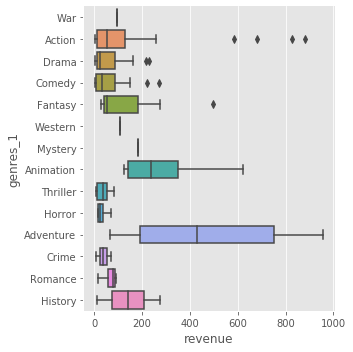

In [99]:
# filter by "budget exists"
filter_1 = df["budget"] > 1

# filter by "budget less than 6 mil"
filter_2 = df["budget"] < 6

# filter by "revenue exists"
filter_3 = df["revenue"] > 1

# filter by "profitable"
filter_4 = df["profit"] > 0

# filter by "recent"
filter_5 = df["year"] > 2000

# filter by "top languages"
filter_6 = df['genres_1'].isin(['Drama', 'Comedy', 'Action', 'Horror', 'Crime'])

df_temp = df[filter_1 & filter_2 & filter_3 & filter_4 & filter_5]

sns.catplot(
    data = df_temp,
    x = "revenue",
    y = "genres_1",
    kind="box",
);

In [97]:
#Exporting dataframe subset to dir data/temp/movie_money_df, making sure that the file is compressed to save memory
df_money.to_csv('data/temp/movie_money_df', index=False, compression='gzip')

In [157]:
df_crew = pd.read_csv('data/raw/kaggle/credits.csv.gz')
df_crew.crew[0]

'[{\'credit_id\': \'52fe4284c3a36847f8024f49\', \'department\': \'Directing\', \'gender\': 2, \'id\': 7879, \'job\': \'Director\', \'name\': \'John Lasseter\', \'profile_path\': \'/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f4f\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12891, \'job\': \'Screenplay\', \'name\': \'Joss Whedon\', \'profile_path\': \'/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f55\', \'department\': \'Writing\', \'gender\': 2, \'id\': 7, \'job\': \'Screenplay\', \'name\': \'Andrew Stanton\', \'profile_path\': \'/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f5b\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12892, \'job\': \'Screenplay\', \'name\': \'Joel Cohen\', \'profile_path\': \'/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f61\', \'department\': \'Writing\', \'gender\': 0, \'id\': 12893, \'job\': \'Screenplay\', \'name\': \'A

In [128]:
list_dept = [dict_obj['department'] for dict_obj in yaml.load(df_crew['crew'][5])]
set(list_dept)


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """Entry point for launching an IPython kernel.


{'Art',
 'Camera',
 'Costume & Make-Up',
 'Crew',
 'Directing',
 'Editing',
 'Lighting',
 'Production',
 'Sound',
 'Visual Effects',
 'Writing'}

In [124]:
list_job = [dict_obj['job'] for dict_obj in yaml.load(df_crew['crew'][5])]
set(list_job)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """Entry point for launching an IPython kernel.


{'Additional Soundtrack',
 'Art Department Coordinator',
 'Art Direction',
 'Assistant Art Director',
 'Assistant Costume Designer',
 'Assistant Director',
 'Associate Producer',
 'Camera Operator',
 'Casting',
 'Casting Associate',
 'Construction Coordinator',
 'Costume Design',
 'Costume Supervisor',
 'Dialogue Editor',
 'Digital Effects Supervisor',
 'Director',
 'Director of Photography',
 'Editor',
 'Executive Producer',
 'First Assistant Camera',
 'First Assistant Editor',
 'Hairstylist',
 'Key Hair Stylist',
 'Makeup Artist',
 'Music Editor',
 'Music Supervisor',
 'Original Music Composer',
 'Producer',
 'Production Design',
 'Rigging Gaffer',
 'Screenplay',
 'Script Supervisor',
 'Set Costumer',
 'Set Decoration',
 'Sound Re-Recording Mixer',
 'Sound Recordist',
 'Special Effects',
 'Special Effects Coordinator',
 'Steadicam Operator',
 'Still Photographer',
 'Stunt Coordinator',
 'Stunts',
 'Supervising Sound Editor',
 'Technical Supervisor',
 'Unit Production Manager',
 'Visu

In [136]:
list_dir = [dict_obj['name'] for dict_obj in yaml.load(df_crew['crew'][5]) if dict_obj['department'] == 'Directing']
list_dir

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """Entry point for launching an IPython kernel.


['Michael Mann', 'Cate Hardman', 'Michael Waxman']

In [189]:
df_crew['Directors'] = df_crew['crew'].apply(lambda yaml_obj: [dict_obj['name'] for dict_obj in yaml.load(yaml_obj) if dict_obj['department'] == 'Directing']).copy()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """Entry point for launching an IPython kernel.


In [190]:
df_crew['Directors'].head()

0    [John Lasseter, Roman Figun, Desirée Mourad]
1                                  [Joe Johnston]
2                                 [Howard Deutch]
3                               [Forest Whitaker]
4                                 [Charles Shyer]
Name: Directors, dtype: object

In [192]:
df_crew['Writers'] = df_crew['crew'].apply(lambda yaml_obj: [dict_obj['name'] for dict_obj in yaml.load(yaml_obj) if dict_obj['department'] == 'Writing'])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """Entry point for launching an IPython kernel.


In [193]:
df_crew['Writers'].head()

0    [Joss Whedon, Andrew Stanton, Joel Cohen, Alec...
1    [Jonathan Hensleigh, Chris van Allsburg, Greg ...
2           [Mark Steven Johnson, Mark Steven Johnson]
3        [Ronald Bass, Terry McMillan, Terry McMillan]
4                       [Nancy Meyers, Albert Hackett]
Name: Writers, dtype: object

In [179]:
df_crew['ExPro'] = df_crew['crew'].apply(lambda yaml_obj: [dict_obj['name'] for dict_obj in yaml.load(yaml_obj) if dict_obj['job'] == 'Executive Producer'])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """Entry point for launching an IPython kernel.


In [194]:
df_crew['ExPro'].head()

0                        [Ed Catmull, Steve Jobs]
1    [Larry J. Franco, Ted Field, Robert W. Cort]
2                                              []
3                                [Terry McMillan]
4                                              []
Name: ExPro, dtype: object

In [196]:
list_act = [dict_obj['name'] for dict_obj in yaml.load(df_crew['cast'][5555]) if dict_obj['order'] < 3]
list_act

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """Entry point for launching an IPython kernel.


['Charles Bronson', 'Jan-Michael Vincent', 'Jill Ireland']

In [224]:
def get_actors(yaml_obj):
    actors = []
    try:
        yaml_obj_read = yaml.load(yaml_obj)
        for dict_obj in yaml_obj_read:
            if dict_obj['order'] < 3:
                actors.append(dict_obj['name'])
    except:
        pass
    return actors

In [225]:
get_actors(df_crew['cast'][8888])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


['Giulietta Masina', 'Marcello Mastroianni', 'Franco Fabrizi']

In [226]:
df_crew['Actors'] = df_crew['cast'].apply(get_actors)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


In [227]:
df_crew.head()

,cast,crew,id,ExPro,Directors,Writers,Actors
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"[Ed Catmull, Steve Jobs]","[John Lasseter, Roman Figun, Desirée Mourad]","[Joss Whedon, Andrew Stanton, Joel Cohen, Alec...","[Tom Hanks, Tim Allen, Don Rickles]"
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"[Larry J. Franco, Ted Field, Robert W. Cort]",[Joe Johnston],"[Jonathan Hensleigh, Chris van Allsburg, Greg ...","[Robin Williams, Jonathan Hyde, Kirsten Dunst]"
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,[],[Howard Deutch],"[Mark Steven Johnson, Mark Steven Johnson]","[Walter Matthau, Jack Lemmon, Ann-Margret]"
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,[Terry McMillan],[Forest Whitaker],"[Ronald Bass, Terry McMillan, Terry McMillan]","[Whitney Houston, Angela Bassett, Loretta Devine]"
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,[],[Charles Shyer],"[Nancy Meyers, Albert Hackett]","[Steve Martin, Diane Keaton, Martin Short]"


In [231]:
df_crew_right = df_crew.iloc[:,2:]

df_crew_right = df_crew_right.rename(columns={'id':'kaggle_id'})

df_crew_right.head()

,kaggle_id,ExPro,Directors,Writers,Actors
0,862,"[Ed Catmull, Steve Jobs]","[John Lasseter, Roman Figun, Desirée Mourad]","[Joss Whedon, Andrew Stanton, Joel Cohen, Alec...","[Tom Hanks, Tim Allen, Don Rickles]"
1,8844,"[Larry J. Franco, Ted Field, Robert W. Cort]",[Joe Johnston],"[Jonathan Hensleigh, Chris van Allsburg, Greg ...","[Robin Williams, Jonathan Hyde, Kirsten Dunst]"
2,15602,[],[Howard Deutch],"[Mark Steven Johnson, Mark Steven Johnson]","[Walter Matthau, Jack Lemmon, Ann-Margret]"
3,31357,[Terry McMillan],[Forest Whitaker],"[Ronald Bass, Terry McMillan, Terry McMillan]","[Whitney Houston, Angela Bassett, Loretta Devine]"
4,11862,[],[Charles Shyer],"[Nancy Meyers, Albert Hackett]","[Steve Martin, Diane Keaton, Martin Short]"


In [255]:
df_crew_right['kaggle_id'] = df_crew_right['kaggle_id'].astype(str)

In [256]:
df_crew_right.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 6 columns):
kaggle_id    45476 non-null object
ExPro        45476 non-null object
Directors    45476 non-null object
Writers      45476 non-null object
Actors       45476 non-null object
kaggle.id    45476 non-null object
dtypes: object(6)
memory usage: 2.1+ MB


In [246]:
df_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5312 entries, 0 to 45422
Data columns (total 23 columns):
adult                5312 non-null bool
budget               5312 non-null int64
kaggle_id            5312 non-null object
imdb_id              5312 non-null object
original_language    5312 non-null object
original_title       5312 non-null object
overview             5302 non-null object
popularity           5312 non-null object
date                 5312 non-null datetime64[ns]
revenue              5312 non-null float64
runtime              5311 non-null float64
status               5312 non-null object
tagline              4587 non-null object
title                5312 non-null object
video                5312 non-null object
vote_avg             5312 non-null float64
vote_count           5312 non-null float64
GENRES               5312 non-null object
COLLECTION           5312 non-null object
LANGUAGES            5312 non-null object
PRODUCER             5312 non-null object
C

In [261]:
df_complete = pd.merge(df_money, df_crew_right, how = 'left', on='kaggle_id')
df_complete.drop(columns=['kaggle.id_x', 'kaggle.id_y'],inplace=True)

In [262]:
#Exporting completed dataframe to dir data/temp/movie_complete_df, making sure that the file is compressed to save memory
df_complete.to_csv('data/temp/movie_complete_df.csv.gz', index=False, compression='gzip')